### TensorFlow 신경망만들기
* CNN 신경망 이해
* 고양이와 강아지 분류를 CNN으로 해보기

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

* 데이터 가져오기

In [11]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)

/root/.keras/datasets/cats_and_dogs_filtered


In [12]:
## 경로 지정
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
val_cats_dir = os.path.join(val_dir, 'cats') 
val_dogs_dir = os.path.join(val_dir, 'dogs') 

## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [13]:
print('학습용 고양이 이미지 총 개수:', num_cats_tr)
print('학습용 강아지 이미지 총 개수:', num_dogs_tr)
print("--")
print('검증용 고양이 이미지 총 개수:', num_cats_val)
print('검증용 강아지 이미지 총 개수:', num_dogs_val)
print("--")
print("학습용 이미지 총 개수:", total_train)
print("검증용 이미지 총 개수:", total_val)

학습용 고양이 이미지 총 개수: 1000
학습용 강아지 이미지 총 개수: 1000
--
검증용 고양이 이미지 총 개수: 500
검증용 강아지 이미지 총 개수: 500
--
학습용 이미지 총 개수: 2000
검증용 이미지 총 개수: 1000


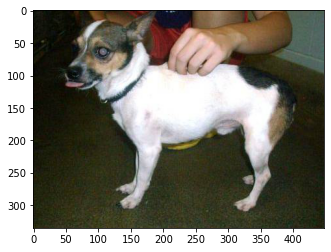

In [14]:
img_path = "/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.214.jpg"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(img_path)
plt.imshow(img)

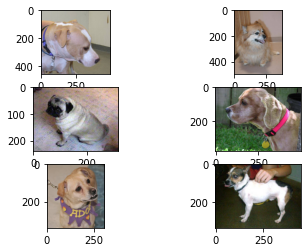

In [15]:
#  'dog.838.jpg', 'dog.967.jpg', 'dog.126.jpg', 'dog.102.jpg', 'dog.563.jpg', 'dog.214.jpg']
img_idx = [838, 967, 126, 102, 563, 214]

cnt = 1
for i in img_idx:
  imgpath = "/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog." + str(i) + ".jpg"
  img = mpimg.imread(imgpath)
  plt.subplot(3,2,cnt)
  plt.imshow(img)
  cnt += 1

In [16]:
train_img_gen=ImageDataGenerator(rescale=1./255) #학습용 제너레이터
val_img_gen=ImageDataGenerator(rescale=1./255) #검증용 제너레이터

In [17]:
IMAGE_HEIGHT=150
IMAGE_WIDTH=150

In [18]:
train_data_gen=train_img_gen.flow_from_directory(batch_size=20, directory=train_dir, shuffle=True, target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),class_mode='binary')
val_data_gen=val_img_gen.flow_from_directory(batch_size=20, directory=val_dir, shuffle=True, target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
model=Sequential([Conv2D(16,3,padding='same',activation='relu',input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)),
                  MaxPooling2D(),
                  Conv2D(32,3,padding='same',activation='relu'),
                  MaxPooling2D(),
                  Conv2D(32,3,padding='same',activation='relu'),
                  MaxPooling2D(),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')
                  ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

In [20]:
batch_size = 20
epochs = 15

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)
print("1 epoch(train) : ", total_train // batch_size)
print("1 epoch(val) : ", total_val // batch_size)
print("batch size : ", batch_size)
print("epochs = ", epochs)
hist = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

학습용 데이터 :  2000
검증용 데이터 :  1000
1 epoch(train) :  100
1 epoch(val) :  50
batch size :  20
epochs =  15
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 [==============================] - 9s 94ms/step - loss: 0.7052 - accuracy: 0.5145 - val_loss: 0.6817 - val_accuracy: 0.5700
Epoch 2/15
100/100 [==============================] - 9s 92ms/step - loss: 0.6542 - accuracy: 0.6255 - val_loss: 0.6152 - val_accuracy: 0.6460
Epoch 3/15
100/100 [==============================] - 9s 92ms/step - loss: 0.5735 - accuracy: 0.7000 - val_loss: 0.5924 - val_accuracy: 0.6750
Epoch 4/15
100/100 [==============================] - 9s 92ms/step - loss: 0.4915 - accuracy: 0.7550 - val_loss: 0.6100 - val_accuracy: 0.6870
Epoch 5/15
100/100 [==============================] - 9s 92ms/step - loss: 0.3959 - accuracy: 0.8215 - val_loss: 0.6837 - val_accuracy: 0.6870
Epoch 6/15
100/100 [==============================] - 9s 91ms/step - loss: 0.3135 - accuracy: 0.8615 - val

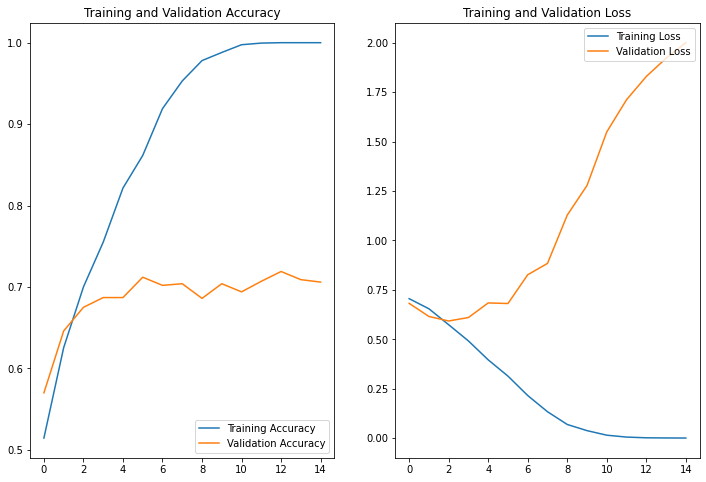

In [23]:
### 결과 시각화 
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()